# Module 6 - Clustering for Diversification Analysis 

Clustering is a method of unsupervised learning and is a common
technique for statistical data analysis used in many fields.

Clustering is a Machine Learning technique that involves the grouping of data points. Given a set of data points, we can use a clustering algorithm to classify each data point into a specific group. In theory, data points that are in the same group should have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features.

In financial Markets, Cluster analysis is a technique used to group sets of objects that share similar characteristics. It is common in statistics, but investors will use the approach to build a diversified portfolio. Stocks that exhibit high correlations in returns fall into one basket, those slightly less correlated in another, and so on, until each stock is placed into a category.

In [1]:
import pandas as pd
import numpy as np
import sklearn.cluster
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import re
import glob
from matplotlib import cm

## Problem Statements

## 6.1 

Create a table/data frame with the closing prices of 30 different stocks, with 10 from each of the caps

In [2]:
def read_csv( filename ):
    if isinstance(filename, pd.DataFrame): return filename  # OPTIMIZATION: allow passthrough of existing dataframe

    dataframe = pd.read_csv( filename, parse_dates=['Date'] )
    dataframe.set_index( dataframe.Date, inplace=True )
    return dataframe

def getName( filename ):
    return re.sub(r'^.+/|\.[^.]+$',     '',    filename)

def getCap( filename ):
    return re.sub(r'^.*/(\w+_Cap)/.*$', '\\1', filename)

In [3]:
filenames = glob.glob('../../data_output/module_1/python3/stocks/**/*.csv')

portfolio_caps_seen = { getCap(filename): 0 for filename in filenames }
portfolio = DataFrame()
for filename in filenames:
    if  portfolio_caps_seen[ getCap(filename) ] < 10:
        portfolio_caps_seen[ getCap(filename) ] += 1
        portfolio[ getName(filename) ] = read_csv(filename).Close_Price

print('portfolio.shape:          ', portfolio.shape)
print('portfolio.shape.dropna(): ', portfolio.dropna().shape)
portfolio.head()

portfolio.shape:           (494, 30)
portfolio.shape.dropna():  (494, 30)


,TITAN,MARUTI,ASIANPAINT,IOC,DRREDDY,TCS,SUNPHARMA,HDFC,AXISBANK,EICHERMOT,...,MINDAIND,ASHOKA,LUXIND,NCC,LALPATHLAB,GUJALKALI,BAJAJELEC,CENTURYPLY,PVR,RCOM
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-15,483.65,6823.90,1148.05,442.10,2675.80,2365.10,654.45,1559.50,500.1,28930.60,...,517.90,216.05,819.60,97.35,900.60,457.35,341.15,266.65,1524.95,32.00
2017-05-16,488.30,6953.95,1142.85,446.60,2724.10,2429.15,652.35,1566.55,501.5,29362.50,...,545.60,214.90,817.50,100.40,910.95,455.25,347.00,266.10,1539.00,32.10
2017-05-17,481.75,6958.20,1154.95,444.25,2736.90,2455.35,650.90,1552.50,502.8,29093.55,...,560.10,217.00,819.80,101.45,911.70,472.65,349.85,264.85,1530.30,31.95
2017-05-18,471.65,6831.05,1151.35,439.90,2678.95,2536.20,653.95,1537.05,492.0,28357.30,...,545.25,209.65,820.05,97.00,909.75,461.85,334.10,260.35,1515.05,31.05
2017-05-19,471.15,6790.55,1123.15,435.40,2656.45,2507.15,653.15,1520.60,501.7,27936.05,...,560.80,206.25,817.80,95.45,910.25,455.35,336.20,254.05,1513.55,30.55


## 6.2 

Calculate average annual percentage return and volatility of all 30 stocks over a theoretical one year period

In [4]:
def normalize_weights( weights ):
    for i in range(0,3):
        weights  = np.round( weights, 3 ) 
        weights /= weights.sum()
    return np.asarray(weights)
    
def random_weights():
    weights  = np.random.rand(portfolio.shape[1])
    return normalize_weights( weights )

weights = random_weights()
weights

array([0.01397206, 0.02694611, 0.0489022 , 0.0499002 , 0.01497006,
       0.02195609, 0.03892216, 0.05289421, 0.01297405, 0.00299401,
       0.00499002, 0.04590818, 0.02694611, 0.00998004, 0.01696607,
       0.01796407, 0.03792415, 0.06287425, 0.0259481 , 0.04191617,
       0.02794411, 0.05888224, 0.07185629, 0.03493014, 0.00898204,
       0.00998004, 0.05788423, 0.01896208, 0.06586826, 0.06886228])

In [5]:
working_days_per_year    = 252
portfolio_summary = DataFrame()
portfolio_summary['returns']    = portfolio.pct_change().mean() * working_days_per_year
portfolio_summary['volatility'] = portfolio.pct_change().std()  * np.sqrt( working_days_per_year )
portfolio_summary

,returns,volatility
TITAN,0.491593,0.324836
MARUTI,0.003937,0.225459
ASIANPAINT,0.097990,0.209462
IOC,-0.413701,0.500046
DRREDDY,0.068044,0.298319
TCS,0.075027,0.431617
SUNPHARMA,-0.192912,0.348418
HDFC,0.137945,0.214557
AXISBANK,0.233194,0.277917
EICHERMOT,-0.176484,0.300184


## 6.3 

Cluster the 30 stocks according to their mean annual Volatilities and Returns using K-means clustering. Identify the optimum number of clusters using the Elbow curve method

In [6]:
cmap = cm.get_cmap('Set1') # Colour map (there are many others)
def get_color(n, max=6):
    if isinstance(n, list): 
        return [ get_color(i, max) for i in n ]
    else:
        return cmap(0. + n/max)

[[<matplotlib.axes._subplots.AxesSubplot object at 0x10631cc88>


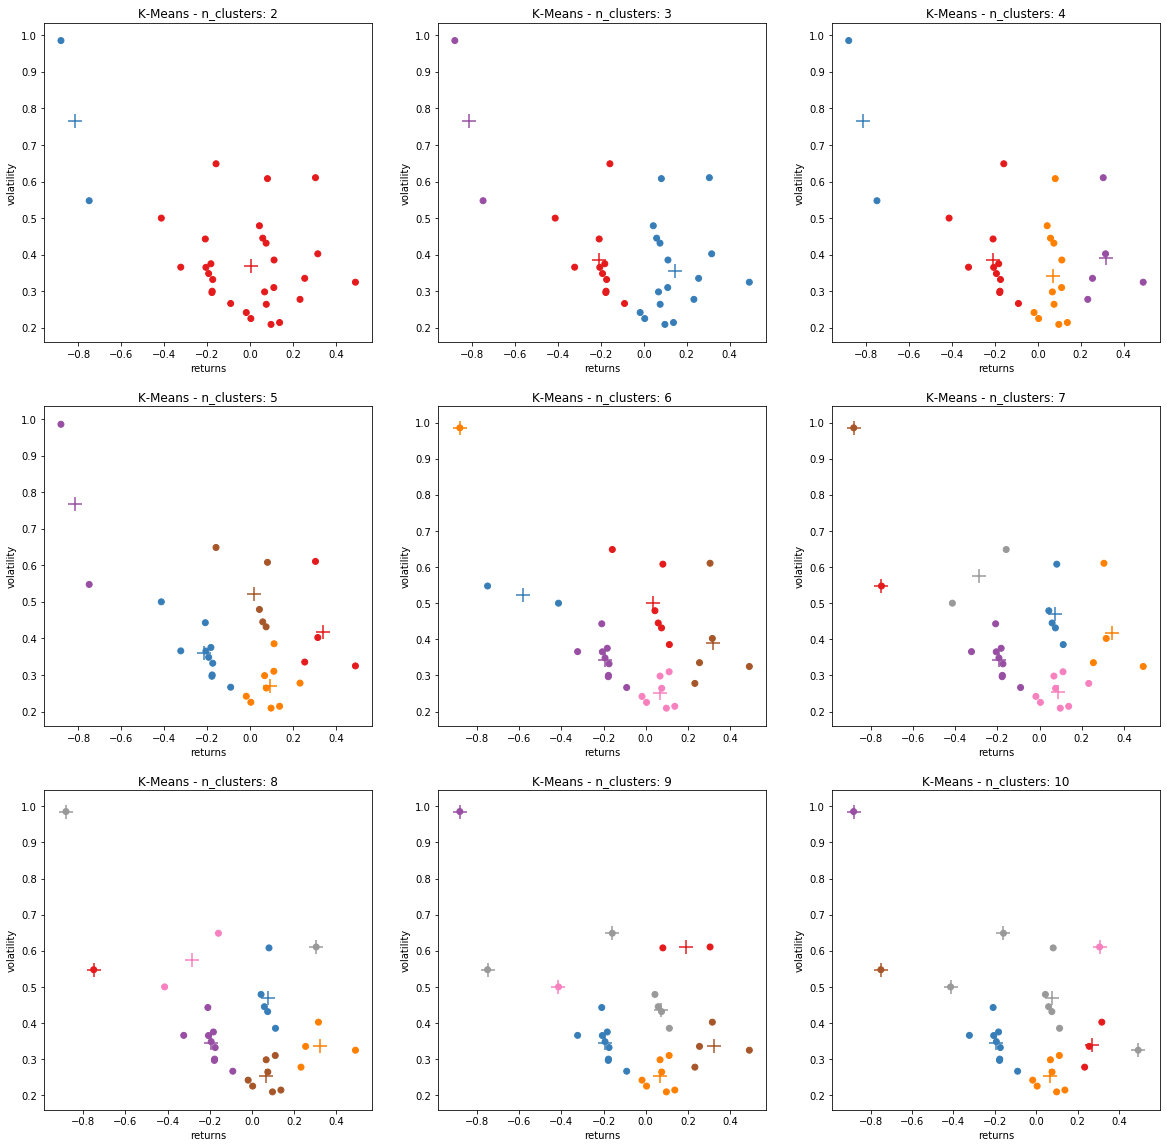

In [7]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
fig, axes = plt.subplots(3,3, figsize=(20,20))

print(axes)
portfolio_kmeans = {}
for x in range(0,len(axes)):
    for y in range(0,len(axes[0])):
        n = 2 + (len(axes[0]) * x) + y
        portfolio_kmeans[n]      = sklearn.cluster.KMeans(n_clusters=n, random_state=0).fit(portfolio_summary)
        portfolio_kmeans_predict = portfolio_kmeans[n].predict(portfolio_summary)

        axes[x][y].scatter( portfolio_summary.returns, portfolio_summary.volatility, c=get_color(portfolio_kmeans_predict) )
        axes[x][y].set_title('K-Means - n_clusters: ' + str(n))
        axes[x][y].set_xlabel('returns')
        axes[x][y].set_ylabel('volatility')
        for i, coords in enumerate( portfolio_kmeans[n].cluster_centers_ ):
           axes[x][y].scatter( coords[0], coords[1], s=200, marker='+', c=[ get_color(i) ] )

## 6.4 

Prepare a separate Data frame to show which stocks belong to the same cluster 

In [8]:
for n, kmeans in portfolio_kmeans.items():
    # print(n, kmeans)
    portfolio_summary['cluster_'+str(n)] = portfolio_kmeans[n].predict( portfolio_summary[['returns', 'volatility']] )
portfolio_summary

,returns,volatility,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10
TITAN,0.491593,0.324836,0,1,2,0,4,3,3,4,9
MARUTI,0.003937,0.225459,0,1,3,3,5,5,4,3,3
ASIANPAINT,0.097990,0.209462,0,1,3,3,5,5,4,3,3
IOC,-0.413701,0.500046,0,0,0,1,1,6,5,5,8
DRREDDY,0.068044,0.298319,0,1,3,3,5,5,4,3,3
TCS,0.075027,0.431617,0,1,3,4,0,1,1,7,6
SUNPHARMA,-0.192912,0.348418,0,0,0,1,2,2,2,1,1
HDFC,0.137945,0.214557,0,1,3,3,5,5,4,3,3
AXISBANK,0.233194,0.277917,0,1,2,3,4,5,3,4,0
EICHERMOT,-0.176484,0.300184,0,0,0,1,2,2,2,1,1
